# COMP529 Assignment 1 - Part 2

Lizhenghe.Chen 



In [106]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1) Unzip stock_data.zip

Load the data into a pandas dataframe. It should have 7 columns:


In [107]:
# load and tranpose csv data
DataFrame = pd.DataFrame(data=pd.read_csv('stock_data.csv'))
# DataFrame

# 2)
use sorted() to sort list, set() to filter the duplicated names

In [108]:
names = set(DataFrame['Name'])
#sort in alphabetical
sorted_names = sorted(names)

print('there are', len(sorted_names), 'stock names')

print('first 5 sorted names', sorted_names[:5])
print('last 5 sorted names', sorted_names[-5:])

there are 505 stock names
first 5 sorted names ['A', 'AAL', 'AAP', 'AAPL', 'ABBV']
last 5 sorted names ['XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']


# 3)
drop_duplicates() can easily find the first/last date for each name

In [109]:
date_after = "2014-01-01"
date_before = "2017-12-31"
# DataFrame['date'] =pd.to_datetime(DataFrame.date)
first_date_list = DataFrame.drop_duplicates(['Name'], keep='first')
last_date_list = DataFrame.drop_duplicates(['Name'], keep='last')

In [110]:
# because it is empty when date_before "2017-12-31", so just do this step
filter_list = first_date_list.loc[first_date_list['date'] > date_after]
data = list(filter_list['Name'])
print('these name were removed: ', data, '\n',
      len(names)-len(data), 'names are left')

these name were removed:  ['APTV', 'BHF', 'BHGE', 'CFG', 'CSRA', 'DWDP', 'DXC', 'EVHC', 'FTV', 'GOOG', 'HLT', 'HPE', 'HPQ', 'INFO', 'KHC', 'NAVI', 'PYPL', 'QRVO', 'SYF', 'UA', 'WLTW', 'WRK'] 
 483 names are left


In [111]:
for i in data:
    # remove the dates in the filter_list
    DataFrame = DataFrame.drop(DataFrame[DataFrame['Name'] == i].index)
# DataFrame

# 4)
I will first filter the dates, 
then use set()'s intersection() and difference() method to identify the common dates

In [112]:
from datetime import datetime, timedelta
date_after = "2017-12-31"
date_before = "2014-01-01"
date_after = (datetime.strptime(date_after, '%Y-%m-%d').date() +  # filter date after means after but not include 2017-12-31
              timedelta(days=1)).strftime('%Y-%m-%d')
date_before = (datetime.strptime(date_before, '%Y-%m-%d').date() -
               timedelta(days=1)).strftime('%Y-%m-%d')

In [113]:
date1 = list(set(DataFrame.loc[DataFrame['date'] <= date_before]['date']))
date2 = list(set(DataFrame.loc[DataFrame['date'] >= date_after]['date']))
date_list = date1+date2

print('there are :', len(date_list), 'days will be filterd')
DataFrame = DataFrame.drop(DataFrame[DataFrame['date'] <= date_before].index)
DataFrame = DataFrame.drop(DataFrame[DataFrame['date'] >= date_after].index)
print('first 5 removed dates', date_list[:5])
print('last 5 removed dates', date_list[-5:])


there are : 252 days will be filterd
first 5 removed dates ['2013-05-15', '2013-10-16', '2013-05-14', '2013-07-10', '2013-10-01']
last 5 removed dates ['2018-01-31', '2018-01-16', '2018-01-03', '2018-01-18', '2018-01-25']


In [114]:
# group each names's dates to list
name_dates = DataFrame.groupby('Name')['date'].apply(list)
# name_dates


In [115]:
common_dates = name_dates[0]  # begain form the first name_date list
# accumulate to find all names' common dates:
for k in range(1, len(name_dates)):
    common_dates = set(common_dates).intersection(set(name_dates[k]))
print('here are the number of commom dates:')
print(len(common_dates))

# then use difference to find uncommon dates
remove_dates = set(DataFrame['date']).difference(set(common_dates))
# remove_dates


here are the number of commom dates:
994


In [116]:
for date in remove_dates:  # remove the uncommon dates
    # print(date)
    DataFrame = DataFrame.drop(DataFrame[DataFrame["date"] == date].index)
#print(len(list(sorted(set(DataFrame['date'])))))

# 5)
create a close_list to store the all name's close data separately to each name, sort the names and dates first can make it easier to pair

In [117]:
newdates = sorted(common_dates)
# sort the names that could add close data easily later
newnames = (sorted(set(DataFrame['Name'])))
# print(newnames)
print(len(newdates), len(newnames), len(names))

# create an empty new DataFrame
newDataFrame = pd.DataFrame(columns=newnames, index=newdates)
# newDataFrame


994 483 505


In [118]:
close_list = DataFrame.groupby('Name')['close'].apply(list)# filter out each name's close data

k = 0
# add each names close data one(cloum) by one(cloum) to newDataFrame
for name in newnames:
    newDataFrame.loc[:, name] = close_list[k]
    k += 1
#newDataFrame.to_csv('/content/drive/MyDrive/Colab Notebooks/COMP529 Assignment 1 Part 2/emm.csv',sep=',',index=True,header=True)
# newDataFrame

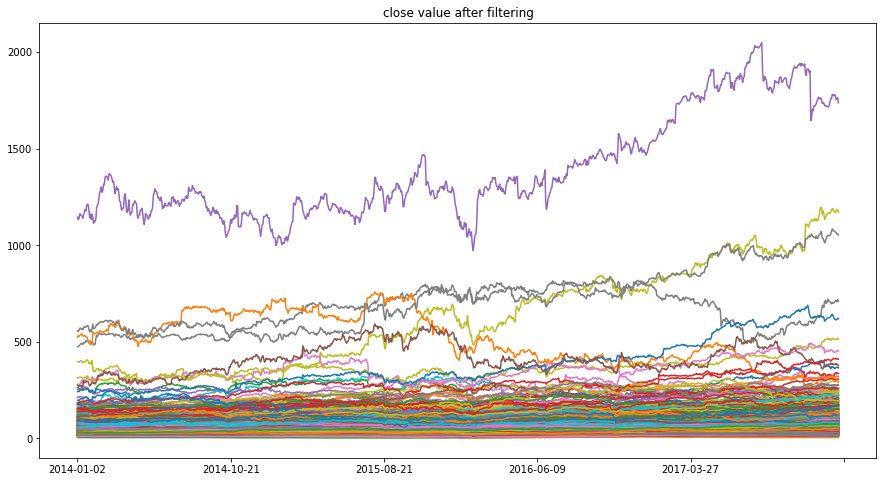

In [119]:
test_fig = newDataFrame.plot(figsize=(15, 8))
test_fig.get_legend().remove()
test_fig.set_title('close value after filtering')
plt.show()

# 6)

I sorted the name and date columns, notice the first row will be caculated and removed


In [120]:
newdates = list(sorted(set(DataFrame['date'])))
newnames = list(sorted(set(DataFrame['Name'])))
# Note that this dataframe should have one less row than the dataframe from step (5):
del(newdates[0])

# create an empty anotherDataFrame
anotherDataFrame = pd.DataFrame(columns=newnames, index=newdates)

In [121]:
k = 0
for c in range(0, anotherDataFrame.shape[0]):
    # (close(name, date) - close(name, previous date)) / close(name, previous date):
    anotherDataFrame.iloc[k] = (
        newDataFrame.iloc[k+1]-newDataFrame.iloc[k])/newDataFrame.iloc[k]
    k += 1

# anotherDataFrame

# 7)
Used the class sklearn.decomposition.PCA 

In [122]:
from sklearn.decomposition import PCA

def generate_PCA(input_DataFrame):
    pca = PCA(n_components=len(newnames))  # keep all dimentions
    principalComponents = pca.fit_transform(input_DataFrame)

    pc_list = []
    # add all principal components to list
    for i in range(1, len(newnames)+1):
        pc_list.append('pc'+str(i))
    principalDf = pd.DataFrame(data=principalComponents, columns=pc_list)

    # (principalDf.loc[:,'pc1']).plot(legend=1, title='pc1')
    # (principalDf.loc['pc2']).plot(legend=1, title='pc2')
    return(principalDf,pca)
    
principalDf,pca = generate_PCA(anotherDataFrame)
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc474,pc475,pc476,pc477,pc478,pc479,pc480,pc481,pc482,pc483
0,-0.021483,-0.031666,0.025927,0.026893,0.001018,0.005838,-0.020973,0.022395,-0.013605,-0.013686,...,0.000903,0.001968,0.000053,-0.003230,0.001099,0.004300,-0.001307,0.000333,0.000494,-0.000301
1,0.087005,0.020140,-0.010365,-0.023034,-0.022075,0.017957,-0.036388,0.027984,-0.019011,0.023106,...,-0.000005,-0.000116,-0.001070,-0.001131,-0.001388,-0.001915,-0.002788,-0.001083,-0.000038,0.001016
2,-0.138037,-0.022034,-0.043514,-0.055666,0.005071,0.017548,0.032574,0.016575,-0.016842,0.002946,...,-0.006188,0.001798,-0.001630,-0.000252,0.002106,-0.002996,-0.005596,-0.001928,0.001446,0.000153
3,-0.034844,-0.040742,0.088260,-0.090818,0.032866,0.017027,-0.018246,0.010623,-0.003406,-0.028702,...,-0.000547,0.004850,0.000361,-0.003724,0.000029,-0.001700,-0.003681,-0.000290,0.001052,0.002019
4,-0.040344,-0.061981,0.012722,0.043641,0.050495,0.061980,-0.022384,0.016281,0.000676,-0.053828,...,0.001236,0.000087,-0.002313,0.002415,-0.000581,0.002913,-0.004018,0.001961,0.002754,-0.003115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,0.000283,0.018264,-0.055224,0.030221,0.005921,0.005422,-0.005312,-0.008588,0.003565,-0.017590,...,0.004748,0.004206,0.002363,0.002084,-0.000515,0.001713,-0.002017,-0.000891,-0.000106,0.000699
989,-0.029212,0.080591,-0.033625,0.062237,0.086519,-0.017535,0.000986,-0.020608,-0.000704,0.020202,...,0.003180,0.001026,-0.000315,-0.000747,0.000707,0.001151,0.001408,-0.001897,0.000306,0.002511
990,0.018784,-0.040848,-0.011801,-0.043092,-0.048400,0.026628,0.003240,-0.008693,0.003176,-0.004485,...,0.000532,-0.000420,0.004172,0.000866,-0.003666,-0.002408,0.001042,0.001282,-0.003492,0.000223
991,-0.046583,0.023081,-0.023947,-0.001904,-0.015394,0.013047,-0.026996,0.002249,-0.018126,-0.012762,...,0.004337,0.003022,-0.007049,-0.003281,-0.000775,0.001438,0.000477,-0.001191,0.002681,0.000712


# 8)


Percentage of variance from first principal component: 26.49 %



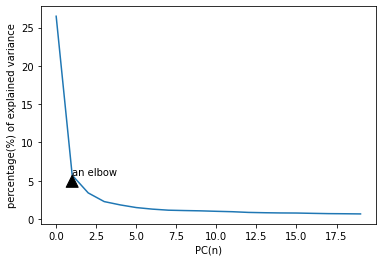

The first 20 PCs contribute 53 % of the data variance of the sample


In [123]:
# extract the explained variance ratiosfrom the PCA:
def generate_variance_ratios(pca):

      explained_variance_ratio_ = pca.explained_variance_ratio_

      y = explained_variance_ratio_[0:20]*100
      print('Percentage of variance from first principal component:',
            round(explained_variance_ratio_[0]*100, 2), '%\n')

      x = range(0, 20)
      plt.plot(x, y)
      plt.ylabel('percentage(%) of explained variance')
      plt.xlabel('PC(n)')
      # plt.hlines(explained_variance_ratio_[1]*100, 0, 2, color="red")  # elbow
      plt.annotate('an elbow', xy=(1, explained_variance_ratio_[1]*100), 
                  arrowprops=dict(facecolor='black', shrink=0.05))
      plt.show()
      plt.close()
      print('The first 20 PCs contribute %d %% of the data variance of the sample' % (sum(y)))
generate_variance_ratios(pca)

**Description:**

As we can see from the output, the first 20 PCs only explained around 53% of the variance, so it is not accurate enough, which means the first 20 PCAs only explain some of the variances.

The first 20 explained variance ratios show the declining trend, which proved that after dimensionality reduction, the increase of the dimensions leads to less important PCAs. Hence, the first number of PCs are the most important. The first PCA(PC1) has the most considerable percentage in this PCA list: 26.49%. 
The Elbow appears in the second PCA; this could mean PCA1 has the most messages to describe the close stock data frame, the rest of PCAs will lose more critical information. 

In conclusion, if the results are correct, then the first 20 PCs still not good enough to describe most of the close data between 01-01-2014 to 31-12-2017

To prove this, I tried some test set below and can see the results shows the First PCA can represent some of the stocks to some extent, but still have some stocks that the PCA1 could not predict correctly:

<AxesSubplot:>

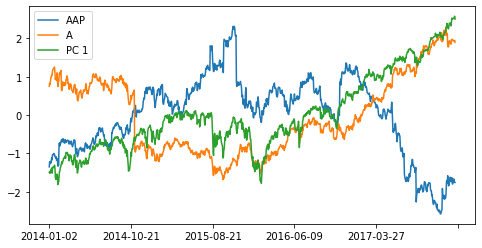

In [124]:
def scale_function(x): return (x - x.mean()) / x.std()

pca_test = PCA(n_components=1).fit(anotherDataFrame)
test = pd.DataFrame()
test['AAP'] = newDataFrame.loc[:, ['AAP']]
test['A'] = newDataFrame.loc[:, ['A']]
test['PC 1'] = pca_test.transform(-newDataFrame)
test.apply(scale_function).plot(figsize=(8, 4))
# import random
# for i in pc_list:
#     plt.scatter(
#         range(0, len(principalDf.loc[:, i])),  principalDf.loc[:, i], color=["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])], alpha=0.8, label=i
#     )

# 9)


95.028 % at PC 252


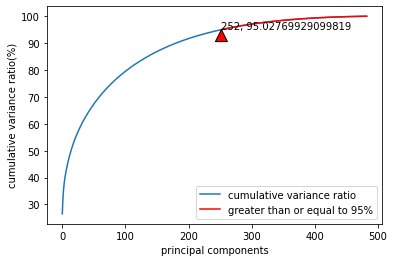

In [125]:
def cumulative_variance_ratios(pca):

    cvr = np.cumsum(pca.explained_variance_ratio_)*100  # %
    # grater_than_95=
    y = cvr
    x = range(0, len(cvr))
    plt.plot(x, y, label='cumulative variance ratio')

    y95 = cvr[cvr >= 95]  # greater than or equal to 95%
    x95 = range(len(cvr)-len(y95), len(cvr))
    print(round(y95[0], 3), "% at PC", len(cvr)-len(y95))
    plt.plot(x95, y95, color='red', label='greater than or equal to 95%')
    plt.annotate(str(len(cvr)-len(y95))+', '+str(y95[0]), xy=(len(cvr)-len(y95), y95[0]),
                 arrowprops=dict(facecolor='red'))
    plt.xlabel('principal components')
    plt.ylabel('cumulative variance ratio(%)')
    plt.legend()
    plt.show()
    plt.close()
cumulative_variance_ratios(pca)

# 10)
sklearn.preprocessing will be used to normalize the dataframe
then do 7-9 again

In [126]:
from sklearn import preprocessing

# use sklearn preprocessing to Normalise the dataframe
scaler = preprocessing.StandardScaler().fit(anotherDataFrame)

# this is the normalized dataframe
normalized = scaler.transform(anotherDataFrame)

print("first 10 of zero means: ", np.round(normalized.mean(axis=0)[
      0:10], 2), "\nfirst 10 of unit variances:", normalized.std(axis=0)[0:10])


first 10 of zero means:  [-0. -0. -0. -0. -0.  0. -0.  0.  0.  0.] 
first 10 of unit variances: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Repeat steps (7) - (9) for this new dataframe:

Percentage of variance from first principal component: 29.3 %



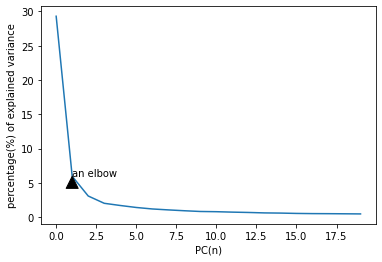

The first 20 PCs contribute 53 % of the data variance of the sample
95.047 % at PC 283


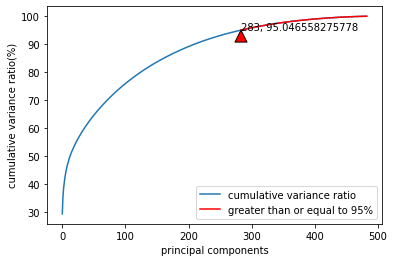

In [127]:
principalDf,pca = generate_PCA(normalized)
generate_variance_ratios(pca)
cumulative_variance_ratios(pca)